# OpenCV tutorials
(https://docs.opencv.org/4.5.1/d9/df8/tutorial_root.html)

- [x] Introduction to OpenCV - build and install OpenCV on your computer
- [x] The Core Functionality (core module) - basic building blocks of the library
- [x] Image Processing (imgproc module) - image processing functions
- [ ] Application utils (highgui, imgcodecs, videoio modules) - application utils (GUI, image/video input/output)

In [1]:
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt
import sys

## Read, display & safe an image

In [27]:
IMG_PATH = "./data/lego_red.jpg" 

In [28]:
img = cv.imread(IMG_PATH)
# img[:,:,2] = 0 # set all red pixels to 0
print(f"image shape:\t\t{img.shape}")
print(f"number of pixels:\t{img.size}")
print(f"image datatype:\t\t{img.dtype}")

image shape:		(800, 1200, 3)
number of pixels:	2880000
image datatype:		uint8


In [30]:
cv.imshow("Display window", img)
k = cv.waitKey(0) # how long wati for user input? 0 -> forever. Returns key pressed

if k == ord("s"):
    cv.imwrite("./data/out/ouput.png", img)
elif k == 27: 
    cv.destroyAllWindows()

## Create trackbars

In [10]:
def nothing(x):
    pass
# Create a black image, a window
img = np.zeros((300,512,3), np.uint8)
cv.namedWindow('image')

# create trackbars for color change
cv.createTrackbar('R','image',0,255,nothing)
cv.createTrackbar('G','image',0,255,nothing)
cv.createTrackbar('B','image',0,255,nothing)

# create switch for ON/OFF functionality
switch = '0 : OFF \n1 : ON'
cv.createTrackbar(switch, 'image',0,1,nothing)
while(1):
    cv.imshow('image',img)
    k = cv.waitKey(1) & 0xFF
    
    if k == 27: # escape key
        break
    
    # get current positions of four trackbars
    r = cv.getTrackbarPos('R','image')
    g = cv.getTrackbarPos('G','image')
    b = cv.getTrackbarPos('B','image')
    s = cv.getTrackbarPos(switch,'image')
    
    if s == 0:
        img[:] = 0
    else:
        img[:] = [b,g,r]

cv.destroyAllWindows()

## Smoothing images

### 2D Convolution ( Image Filtering )

As in one-dimensional signals, images also can be filtered with various low-pass filters (LPF), high-pass filters (HPF), etc. **LPF helps in removing noise, blurring images, etc. HPF filters help in finding edges in images.**

OpenCV provides a function **cv.filter2D()** to convolve a kernel with an image. As an example, we will try an averaging filter on an image. A 5x5 averaging filter kernel will look like the below:

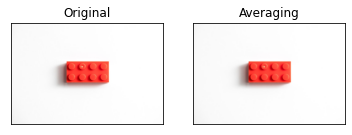

In [31]:
from matplotlib import pyplot as plt

# convert colorspace for correct colors when plotting with matplotlib
RGB_img = cv.cvtColor(img, cv.COLOR_BGR2RGB) 

kernel = np.ones((5,5),np.float32)/25
dst = cv.filter2D(RGB_img,-1,kernel)
plt.subplot(121),plt.imshow(RGB_img),plt.title('Original')
plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(dst),plt.title('Averaging')
plt.xticks([]), plt.yticks([])
plt.show()

## Image Blurring (Image Smoothing) 

Image blurring is achieved by convolving the image with a low-pass filter kernel. It is **useful for removing noise**. It actually **removes high frequency content (eg: noise, edges)** from the image. So **edges are blurred a little bit in this operation (there are also blurring techniques which don't blur the edges)**. OpenCV provides four main types of blurring techniques.

There are 4 main techniques: 
1. Averaging
2. Gaussian Blurring
3. Median Blurring
4. Bilateral Filtering

more information: https://docs.opencv.org/4.5.1/d4/d13/tutorial_py_filtering.html

## Morphological Transformations

- **Opening**: is just another name of erosion followed by dilation. It is **useful in removing noise**, as we explained above. Here we use the function, cv.morphologyEx() 
- **Closing**: reverse of Opening, Dilation followed by Erosion. It is **useful in closing small holes inside the foreground objects, or small black points on the object**. 
- **Morphological Gradient**: It is the difference between dilation and erosion of an image. The **result will look like the outline of the object**. 

## Image Gradients
OpenCV provides three types of gradient filters or High-pass filters.  
Goal: Find **Image gradients, edges** etc.

1. Sobel and Scharr Derivatives

### 1. Sobel and Scharr Derivatives
Sobel operators is a joint Gausssian smoothing plus differentiation operation, so it is **more resistant to noise**. You can specify the direction of derivatives to be taken, vertical or horizontal (by the arguments, yorder and xorder respectively). You can also specify the size of kernel by the argument ksize. If ksize = -1, a 3x3 Scharr filter is used which gives better results than 3x3 Sobel filter. Please see the docs for kernels used.

### 2. Laplacian Derivatives

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


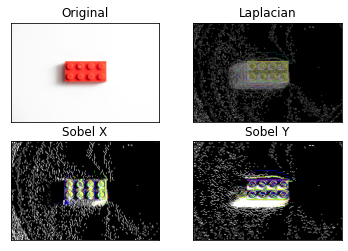

In [33]:
laplacian = cv.Laplacian(img,cv.CV_64F)
sobelx = cv.Sobel(img,cv.CV_64F,1,0,ksize=5)
sobely = cv.Sobel(img,cv.CV_64F,0,1,ksize=5)

plt.subplot(2,2,1),plt.imshow(RGB_img,cmap = 'gray')
plt.title('Original'), plt.xticks([]), plt.yticks([])

plt.subplot(2,2,2),plt.imshow(laplacian,cmap = 'gray')
plt.title('Laplacian'), plt.xticks([]), plt.yticks([])

plt.subplot(2,2,3),plt.imshow(sobelx,cmap = 'gray')
plt.title('Sobel X'), plt.xticks([]), plt.yticks([])

plt.subplot(2,2,4),plt.imshow(sobely,cmap = 'gray')
plt.title('Sobel Y'), plt.xticks([]), plt.yticks([])

plt.show()

## Canny edge detection 

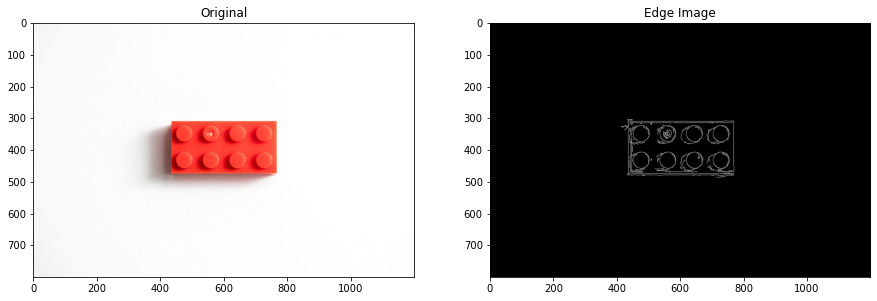

In [41]:
edges = cv.Canny(img,50,100)
#plt.subplot(121),plt.imshow(RGB_img,cmap = 'gray')
#plt.title('Original Image'), plt.xticks([]), plt.yticks([])
#plt.subplot(122),plt.imshow(edges,cmap = 'gray')
#plt.title('Edge Image'), plt.xticks([]), plt.yticks([])
#plt.show()

f = plt.figure(figsize=(15,5))
ax1 = f.add_subplot(121)
ax2 = f.add_subplot(122)

ax1.set_title("Original")
ax2.set_title("Edge Image")

ax1.imshow(RGB_img,cmap = 'gray')
ax2.imshow(edges,cmap = 'gray')

In [ ]:
""" 
CannyTrackbar function allows for a better understanding of 
the mechanisms behind Canny Edge detection algorithm and rapid
prototyping. The example includes basic use case.

2 of the trackbars allow for tuning of the Canny function and
the other 2 help with understanding how basic filtering affects it.
"""
import cv2

def empty_function(*args):
    pass

def CannyTrackbar(img):
    win_name = "CannyTrackbars"

    cv2.namedWindow(win_name)
    cv2.resizeWindow(win_name, 500,100)

    cv2.createTrackbar("canny_th1", win_name, 0, 255, empty_function)
    cv2.createTrackbar("canny_th2", win_name, 0, 255, empty_function)
    cv2.createTrackbar("blur_size", win_name, 0, 255, empty_function)
    cv2.createTrackbar("blur_amp", win_name, 0, 255, empty_function)

    while True:
        cth1_pos = cv2.getTrackbarPos("canny_th1", win_name)
        cth2_pos = cv2.getTrackbarPos("canny_th2", win_name)
        bsize_pos = cv2.getTrackbarPos("blur_size", win_name)
        bamp_pos = cv2.getTrackbarPos("blur_amp", win_name)

        img_blurred = cv2.GaussianBlur(img.copy(), (bsize_pos * 2 + 1, bsize_pos * 2 + 1), bamp_pos)
        canny = cv2.Canny(img_blurred, cth1_pos, cth2_pos)
        cv2.imshow(win_name, canny)

        key = cv2.waitKey(1) & 0xFF
        if key == ord("c"):
            break

    cv2.destroyAllWindows()
    return canny

img = cv2.imread(IMG_PATH)
canny = CannyTrackbar(img)

## Contours in OpenCV
Contours can be explained simply as a curve joining all the continuous points (along the boundary), having same color or intensity. The **contours are a useful tool for shape analysis and object detection and recognition**.

For **better accuracy, use binary images**. So before finding contours, apply threshold or canny edge detection.

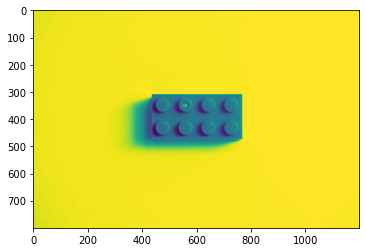

In [42]:
im = img
imCopy = im.copy()
imgray=cv.cvtColor(im,cv.COLOR_BGR2GRAY)
plt.imshow(imgray)
ret,thresh = cv.threshold(imgray,127,255,0)
contours, hierarchy =  cv.findContours(thresh,cv.RETR_TREE,cv.CHAIN_APPROX_SIMPLE)
#cv.drawContours(imCopy,contours,-1,(0,255,0))
#cv.imshow('draw contours',imCopy)
#cv.waitKey(0)

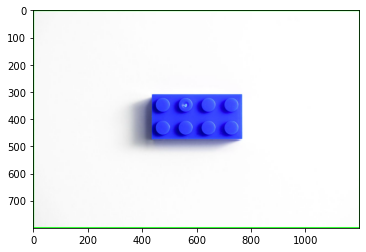

In [43]:
cnt = contours[0]
x,y,w,h = cv.boundingRect(cnt)
cv.rectangle(img,(x,y),(x+w,y+h),(0,255,0),5)
plt.imshow(img)

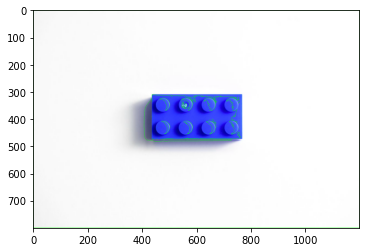

In [44]:
cv.drawContours(imCopy,contours,-1,(0,255,0))
plt.imshow(imCopy)

## Histograms

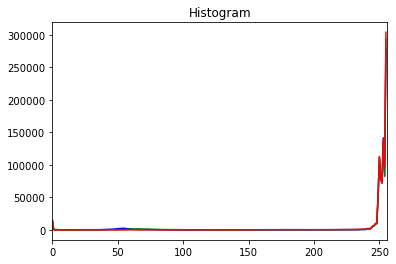

In [45]:
plt.title("Histogram")
color = ('b','g','r')
for i,col in enumerate(color):
    histr = cv.calcHist([img],[i],None,[256],[0,256])
    plt.plot(histr,color = col)
    plt.xlim([0,256])
plt.show()